In [1]:
# multidimensional arrays
import numpy as np
import math as math

# inline plots
import matplotlib.pyplot as plt
%matplotlib inline

# nicer figures
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

Creo la funzione che calcola la distribuzione di probabilità di r

In [2]:
def rho(r, z, a, R):
    return 0.5 * (2-2*z)/(R ** (2 - 2*z) - a ** (2 - 2*z)) * r ** (1 - 2*z)

Di seguito scrivo un programma che calcoli diversi profili di rho

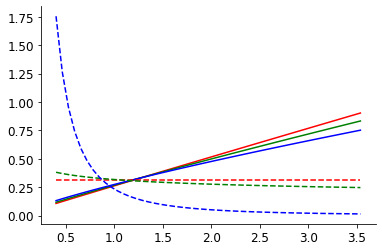

In [3]:
#setto i parametri

R=2
a=0.4
L=R
r=np.zeros(50)

#creo i vettori che mi servono
z = np.array([0.01, 0.05, 0.1, 0.5, 0.6, 1.6])
for i in range(50):
    r[i]=a + (R-a) * R/50 * i

#plotto i diversi profili di rho
plt.plot(r, rho(r, z[0], a, R), 'r-', r, rho(r, z[1], a, R), 'g-', r, rho(r, z[2], a, R), 'b-', r, rho(r, z[3], a, R), 'r--', r, rho(r, z[4], a, R), 'g--', r, rho(r, z[5], a, R), 'b--')
plt.show()

Per simulare la distribuzione ho bisogno di invertire la cumulativa. Prima di tutto creo la cumulativa.

In [4]:
def F(x, z, R, a):
    return (x * (R ** (2 - 2*z) - a ** (2 - 2*z)) + a ** (2 - 2*z)) ** (1/(2 - 2*z))

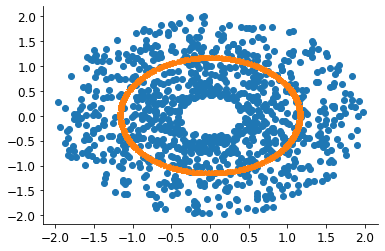

In [5]:
N = 1000
x = np.random.uniform(size=N)
index = 4
pippo = F(x, z[index], R, a)
theta = np.random.uniform(size=N)*(2*math.pi)
posizioni = np.zeros((N,2))
circonf = np.zeros((N,2))
r_medio = (((2 - 2*z[index])*(R ** (3 - 2*z[index]) - a ** (3 - 2*z[index])))/((3 -2*z[index])*(R ** (2 - 2*z[index]) - a ** (2 - 2*z[index]))))
for i in range(N):
    posizioni[i][0] = pippo[i]*math.cos(theta[i])
    posizioni[i][1] = pippo[i]*math.sin(theta[i])
    circonf[i][0] = r_medio * math.cos(theta[i])
    circonf[i][1] = r_medio * math.sin(theta[i])

plt.plot(posizioni[:,0], posizioni[:,1], 'o', circonf[:,0], circonf[:,1], '*')
plt.show()